In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, Aer
import random
import networkx as nx
import matplotlib.pyplot as plt
import arviz as az
import random


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# ---------------------Fig.6:Data----------------------------------

flip=1
coe_J=0.03
# Plist=[1,3,5,10, 30, 50, 70]
Plist=[1,5,10, 30, 70]
#------------1st. Metropolis Hasting--------------------------------------  
logprob_MH= []  
for r in range(10):  
    
    file_path = "logprob_MetropolisHastings_flips="+str(flip)+"_J="+str(coe_J)+"_m=1_r"+str(r)+"_esscountingmean.txt"
    print(file_path)
    logprob_onerep=[]
    with open(file_path, 'r') as file:
        for line in file:
            cleaned_line = (line.strip()).split(' ') # Remove newline characters
            logprob_onerep.append(int(cleaned_line[0]))
    logprob_MH.append(logprob_onerep)

#------------2nd. Barker P=1,5,10,30,70 -------------------------------------------------


logprob_Barker =[]
for coe_P in Plist:
    logprob_repi=[]
    for r in range(10): 
        file_path = "logprob_Barker_flips="+str(flip)+"_P="+str(coe_P)+"_J="+str(coe_J)+"_m=1_r"+str(r)+"_esscountingmean.txt"
        print(file_path)
        logprob_Barker_p= []

        with open(file_path, 'r') as file:
            for line in file:
                cleaned_line = (line.strip()).split(' ') # Remove newline characters
                logprob_Barker_p.append(int(cleaned_line[0]))        
        logprob_repi.append(logprob_Barker_p)
    logprob_Barker.append(logprob_repi)

logprob_MetropolisHastings_flips=1_J=0.03_m=1_r0_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r1_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r2_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r3_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r4_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r5_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r6_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r7_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r8_esscountingmean.txt
logprob_MetropolisHastings_flips=1_J=0.03_m=1_r9_esscountingmean.txt
logprob_Barker_flips=1_P=1_J=0.03_m=1_r0_esscountingmean.txt
logprob_Barker_flips=1_P=1_J=0.03_m=1_r1_esscountingmean.txt
logprob_Barker_flips=1_P=1_J=0.03_m=1_r2_esscountingmean.txt
logprob_Barker_flips=1_P=1_J=0.03_m=1_r3_esscountingmean.txt
logprob_Barker_flips=1_P=1_J=0.03_m=1_r4_esscountingmean.txt
logpr

In [3]:
#  ---------------------Fig.6:Calculate Effective Sample Size----------------------------------
start=20000
finish=120000
one_over=10

ESScount=[]
for i in range(len(Plist)):
    ESS_p=0
    for r in range(10):
        ESS_p+=az.ess(np.array(logprob_Barker[i][r][start:finish]))/one_over
    ESScount.append(ESS_p)
    
MH_ESS_list=[]
for r in range(10):
    MH_ESS_list.append(az.ess(np.array(logprob_MH[r][start:finish])))
MH_ESS=np.mean(MH_ESS_list)

C:\Users\user\anaconda3\envs\my-quantum-env\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


In [4]:
#---------------------Fig.6:Calculate Effective Sample Size for QPMCMC/multiproposal MCMC(PMCMC)--------------------------
QPMCMC_ESS=[]
for i in range(len(Plist)):
    QPMCMC_ESS.append(ESScount[i])
    
PMCMC_ESS=[]
for i in range(len(Plist)):
    PMCMC_ESS.append(ESScount[i]/(Plist[i]+1)) 
    
print(QPMCMC_ESS,PMCMC_ESS)

[61.30120163572092, 101.78415247001065, 116.2348155147324, 129.71453789701386, 133.69792245123583] [30.65060081786046, 16.96402541166844, 10.566801410430218, 4.184339932161738, 1.8830693302990962]


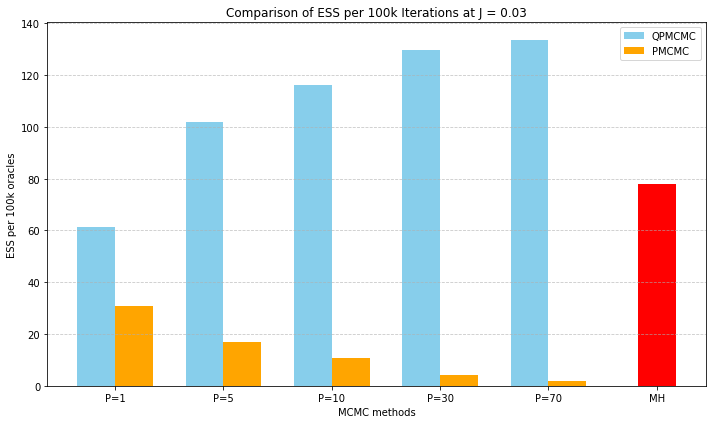

<Figure size 432x288 with 0 Axes>

In [6]:
# ----------------------------Fig.6:Display----------------------------------

# name of the bars
experiments = []
for i in range(len(Plist)):
    experiments.append('P='+str(Plist[i]))
experiments.append('MH')

bar_width = 0.35
x = np.arange(len(experiments)-1)
x_extend=np.arange(len(experiments))

# plot the bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, QPMCMC_ESS, width=bar_width, label='QPMCMC', color='skyblue')
plt.bar(x + bar_width/2, PMCMC_ESS, width=bar_width, label='PMCMC', color='orange')
plt.bar(x_extend[-1], MH_ESS, width=bar_width, color='red')

plt.xlabel('MCMC methods')
plt.ylabel('ESS per 100k oracles')
plt.title('Comparison of ESS per 100k Iterations at J = '+str(coe_J))
plt.xticks(x_extend, experiments)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig("ESS_ComparisonJ_003", dpi=200)

1.6625